In [2]:
# графики. Посмотреть как на методы влияют на картинку (количество пикселей от цвета)

from google.colab import files
from io import BytesIO
from PIL import Image
from skimage import io

uploaded = files.upload()

import matplotlib.pyplot as plt

Saving image1.jpg to image1 (1).jpg


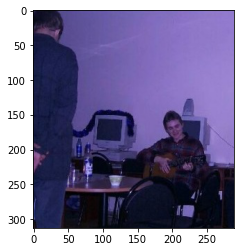

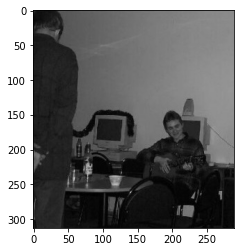

In [3]:
# преобразование к полутоновому изображению

from PIL import Image, ImageDraw 
from skimage import img_as_float

image = io.imread(BytesIO(uploaded['image1.jpg']))
image_grey = image.copy()

width = image.shape[0]
height = image.shape[1]

for i in range(width):
  for j in range(height):
    r = image[i,j][0] * 0.3
    g = image[i,j][1] * 0.59
    b = image[i,j][2] * 0.11
    mean = r + g + b
    image_grey[i,j] = [mean, mean, mean]

plt.imshow(image)
plt.show()
plt.close()

plt.imshow(image_grey)
plt.show()
plt.close()

Saving image2.jpg to image2.jpg
0.32941176470588235 0.44705882352941173 0.5490196078431373


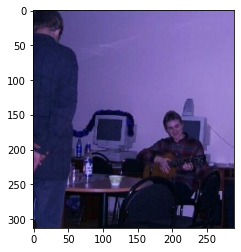

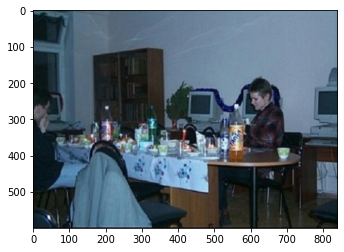

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


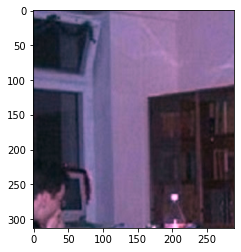

In [4]:
# по опорному цвету

import math

uploaded = files.upload()

image_better = io.imread(BytesIO(uploaded['image2.jpg']))
image_better = img_as_float(image_better)
image = img_as_float(image)
image_ref_color = image.copy()

r_dst = image_better[340, 838][0]
g_dst = image_better[340, 838][1]
b_dst = image_better[340, 838][2]


r_src = image_better[340, 838][0]
g_src = image_better[340, 838][1]
b_src = image_better[340, 838][2]

print(r_dst, g_dst, b_dst)

#min_df = 0;
#max_df = 255;

#for i in range(width):
#  for j in range(height):
#    r = max(image[i,j][0] * (min(image_better[i,j][0]  / r_dst), 0), 255) if r_dst != 0  else 0
#    g = max(image[i,j][1] * (min(image_better[i,j][1]  / g_dst), 0), 255) if g_dst != 0  else 0
#    b = max(image[i,j][2] * (min(image_better[i,j][2]  / b_dst), 0), 255) if b_dst != 0  else 0
#    image_ref_color[i,j] = [r, g, b]

for i in range(width):
  for j in range(height):
    r = image[0,255][0] * (image_better[i,j][0] / r_dst) if r_dst != 0  else 0
    g = image[0,255][1] * (image_better[i,j][1] / g_dst) if g_dst != 0  else 0
    b = image[0,255][2] * (image_better[i,j][2] / b_dst) if b_dst != 0  else 0
    image_ref_color[i,j] = [r, g, b]


plt.imshow(image)
plt.show()
plt.close()

plt.imshow(image_better)
plt.show()
plt.close()

plt.imshow(image_ref_color)
plt.show()
plt.close()

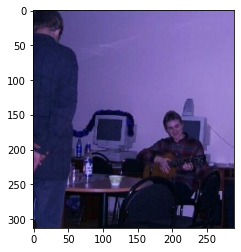

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


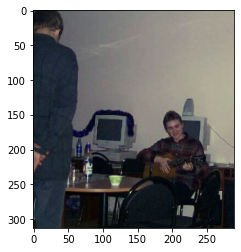

In [5]:
# "серый мир"

image_grey_world = image.copy()

image_grey_world = img_as_float(image_grey_world)

for i in range(width):
  for j in range(height):
    r += image[i,j][0]
    g += image[i,j][1]
    b += image[i,j][2]

r_mean = r/image.sum()
g_mean = g/image.sum()
b_mean = b/image.sum()
mean = (r_mean + g_mean + b_mean) / 3
r_coef = (mean / r_mean)
g_coef = (mean / g_mean)
b_coef = (mean / b_mean)

for i in range(width):
  for j in range(height):
    r = image[i,j][0] * r_coef
    g = image[i,j][1] * g_coef
    b = image[i,j][2] * b_coef
    image_grey_world[i,j] = [r,g,b]

plt.imshow(image)
plt.show()
plt.close()

plt.imshow(image_grey_world)
plt.show()
plt.close()

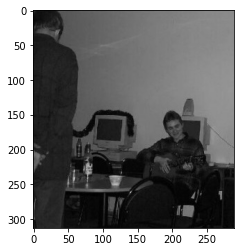

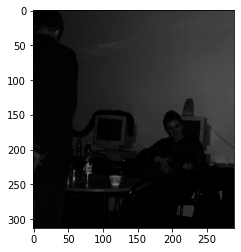

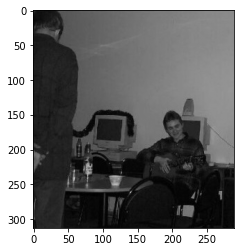

In [6]:
# по виду функции преобразования - гамма коррекция и обратная гамма коррекции

image_gamma_correction = image_grey.copy()

image_gamma_correction = img_as_float(image_gamma_correction)

gamma = 2.2

for i in range(width):
  for j in range(height):
    r = image_gamma_correction[i,j][0] ** gamma
    g = image_gamma_correction[i,j][1] ** gamma
    b = image_gamma_correction[i,j][2] ** gamma
    image_gamma_correction[i,j] = [r,g,b]

image_reverse =  image_gamma_correction.copy()
gamma_reverse = 1/gamma

for i in range(width):
  for j in range(height):
    r = image_gamma_correction[i,j][0] ** gamma_reverse
    g = image_gamma_correction[i,j][1] ** gamma_reverse
    b = image_gamma_correction[i,j][2] ** gamma_reverse
    image_reverse[i,j] = [r,g,b]

plt.imshow(image_grey)
plt.show()
plt.close()

plt.imshow(image_gamma_correction)
plt.show()
plt.close()

plt.imshow(image_reverse)
plt.show()
plt.close()

Saving norm.jpg to norm.jpg


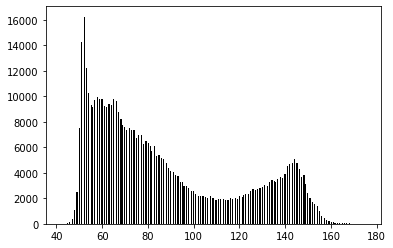

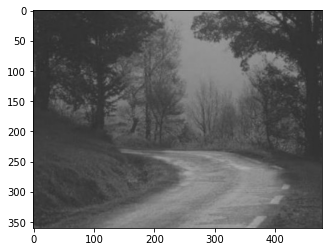

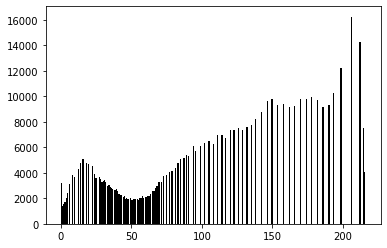

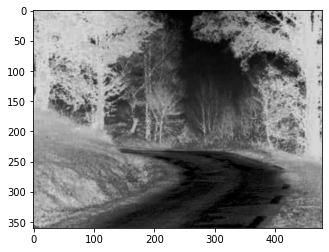

In [7]:
# нормализация гистограммы

import numpy as np
from skimage import img_as_float

uploaded = files.upload()

img_norm = io.imread(BytesIO(uploaded['norm.jpg']))
histogram = plt.hist(img_norm.ravel(), bins = 256, color = 'black', )
plt.show()

img = img_norm.copy()

plt.imshow(img_norm)
plt.show()
plt.close()

rmax = img_norm[:,:,0].max()
rmin = img_norm[:,:,0].min()
gmax = img_norm[:,:,1].max()
gmin = img_norm[:,:,1].min()
bmax = img_norm[:,:,2].max()
bmin = img_norm[:,:,2].min()

histogram = np.zeros(256)

for i in range(img_norm.shape[0]):
  for j in range(img_norm.shape[1]):
    histogram[255 * img_norm[i,j]] = histogram[np.round(255 * img_norm[i,j])]+1;

min = img_norm.min()
max = img_norm.max()
for i in range(len(histogram)):
  histogram[i] = round(((255-min)*histogram[i])/(img_norm.shape[0] * img.shape[1]))
  #histogram[i] = (histogram[i] - min) * round(255/(max - min))

#print(histogram)

for i in range(len(histogram)):
  histogram[i] = histogram[i-1] + histogram[i]

for i in range(img_norm.shape[0]):
  for j in range(img_norm.shape[1]):
    img_norm[i,j] = histogram[np.round(255 * img_norm[i, j])];

histogram = plt.hist(img_norm.ravel(), bins = 256, color = 'black', )
plt.show()

plt.imshow(img_norm)
plt.show()
plt.close()

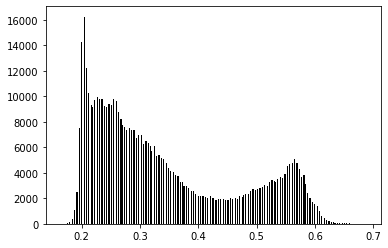

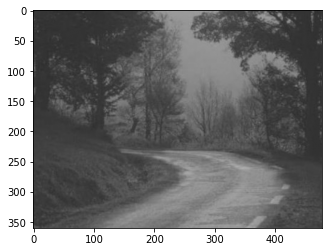

0.6862745098039216 0.6862745098039216 0.6862745098039216


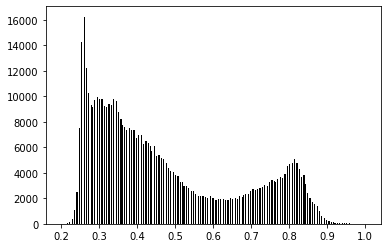

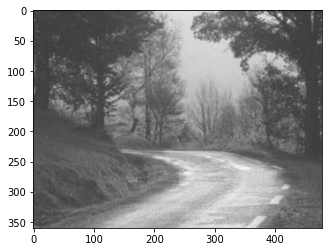

In [8]:
# нормализация гистограммы
import numpy as np
from skimage import img_as_float

img_norm = io.imread(BytesIO(uploaded['norm.jpg']))
img_norm = img_as_float(img_norm)
histogram = plt.hist(img_norm.ravel(), bins = 256, color = 'black', )
plt.show()

img = img_norm.copy()

plt.imshow(img_norm)
plt.show()
plt.close()

rmax = img_norm[:,:,0].max()
rmin = img_norm[:,:,0].min()
gmax = img_norm[:,:,1].max()
gmin = img_norm[:,:,1].min()
bmax = img_norm[:,:,2].max()
bmin = img_norm[:,:,2].min()

print(rmax, gmax, bmax)

for i in range(img_norm.shape[0]):
  for j in range(img_norm.shape[1]):
    r = (img_norm[i,j][0] - rmin) * ((1.-0.2)/(rmax-rmin)) + 0.2
    g = (img_norm[i,j][1] - gmin) * ((1.-0.2)/(gmax-gmin)) + 0.2
    b = (img_norm[i,j][2] - bmin) * ((1.-0.2)/(bmax-bmin)) + 0.2
    img_norm[i,j] = [r,g,b]

img_norm

histogram = plt.hist(img_norm.ravel(), bins = 256, color = 'black', )
plt.show()

plt.imshow(img_norm)
plt.show()
plt.close()

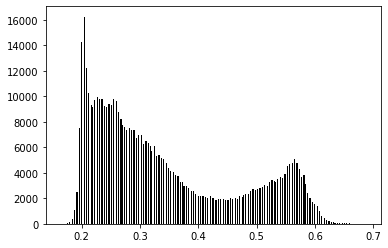

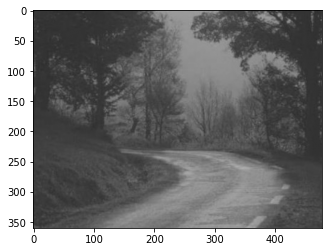

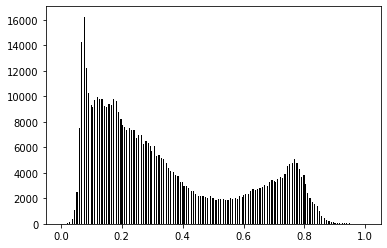

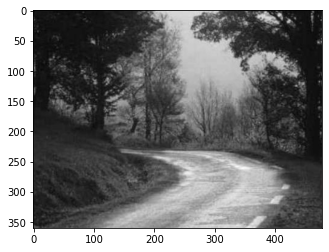

In [9]:
# нормализация гистограммы
import numpy as np
from skimage import img_as_float
import cv2

img_norm = io.imread(BytesIO(uploaded['norm.jpg']))
img_norm = img_as_float(img_norm)
histogram = plt.hist(img_norm.ravel(), bins = 256, color = 'black', )
plt.show()

plt.imshow(img_norm)
plt.show()
plt.close()

def normaliseImg(self, img):
     channel = cv2.split(img)
     for i in channel[1]:
         i += 5
     cv2.normalize(channel[1], channel[1], 0, 1.0, cv2.NORM_MINMAX)
     cv2.normalize(channel[2], channel[2], 0, 1.0, cv2.NORM_MINMAX)
     cv2.normalize(channel[0], channel[0], 0, 1.0, cv2.NORM_MINMAX)
     return cv2.merge(channel, img)  

img = normaliseImg(1,img_norm)

histogram = plt.hist(img_norm.ravel(), bins = 256, color = 'black', )
plt.show()

plt.imshow(img_norm)
plt.show()
plt.close()

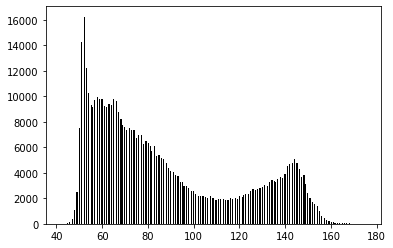

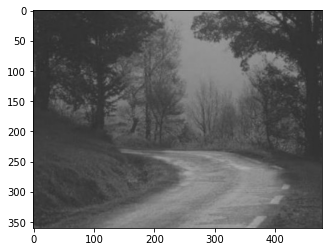

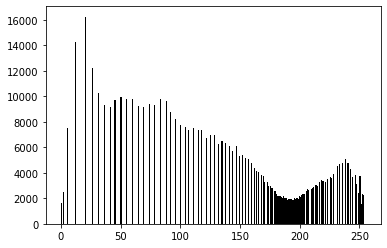

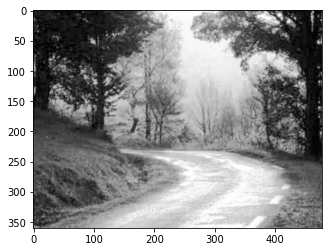

In [10]:
# эквализация гистрограммы

from google.colab import files
from io import BytesIO
from PIL import Image
from skimage import io


import matplotlib.pyplot as plt
import numpy as np

img_ex = io.imread(BytesIO(uploaded['norm.jpg']))

histogram = plt.hist(img_ex.ravel(), bins = 256, color = 'black', )
plt.show()

plt.imshow(img_ex)
plt.show()
plt.close()

flat = img_ex.flatten()

def get_histogram(image, bins):
    # массив с размером ячеек, обнуленный
    histogram = np.zeros(bins)
    
    # перебирать пиксели и суммировать количество пикселей
    for pixel in image:
        histogram[pixel] += 1
    
    # вернуть окончательный результат
    return histogram

# выполнить функцию гистограммы
hist = get_histogram(flat, 256)

def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# выполнить fn
cs = cumsum(hist)

# числитель и знаменатель
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# повторно нормализовать кончину
cs = nj / N

# возврат к uint8, так как мы не можем использовать значения с плавающей запятой в изображениях
cs = cs.astype('uint8')

img_new = cs[flat]

# вернуть массив в исходную форму, так как мы его сплющили
img_new = np.reshape(img_new, img.shape)

histogram = plt.hist(img_new.ravel(), bins = 256, color = 'black', )
plt.show()
plt.imshow(img_new)
plt.show()
plt.close()